# Loading the dataset

backg=0, fore=6634


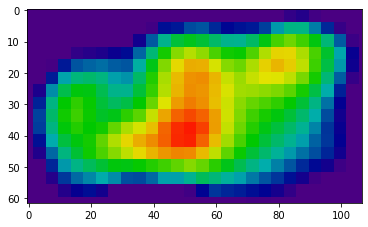

In [13]:
from PIL import Image
im = Image.open('sub1left.png')
import matplotlib.pyplot as plt

backg = 0
real = 0

for pixel in im.getdata():
    if pixel == (0,0,0 ): # if your image is RGB (if RGBA, (0, 0, 0, 255) or so
        backg += 1
    else:
        real += 1
print('backg=' + str(backg)+', fore='+str(real))
plt.imshow(im)

backg=0, fore=14157


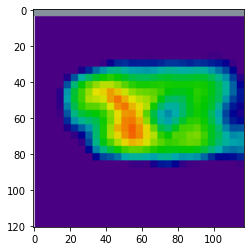

In [14]:
from PIL import Image
im = Image.open('sub1right.png')
import matplotlib.pyplot as plt

backg = 0
real = 0

for pixel in im.getdata():
    if pixel == (0,0,0 ): # if your image is RGB (if RGBA, (0, 0, 0, 255) or so
        backg += 1
    else:
        real += 1
print('backg=' + str(backg)+', fore='+str(real))
plt.imshow(im)

# Contours

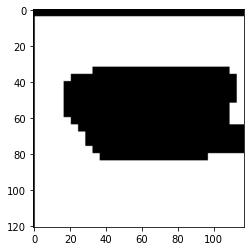

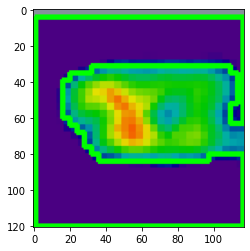

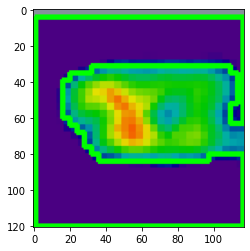

In [15]:
import cv2
import matplotlib.pyplot as plt
image= cv2.imread("sub1right.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 50, 175, cv2.THRESH_BINARY_INV)
#_, binary1 = cv2.threshold(gray, 0, 50, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap="gray")
plt.show()
#plt.imshow(binary1, cmap="gray")
#plt.show()
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
plt.imshow(image)
plt.show()
plt.imshow(image)
plt.show()

Hough Lines and canny edges

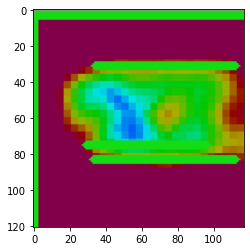

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("sub1right.png")
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(grayscale, 50, 175)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(image, (x1, y1), (x2, y2), (20, 220, 20), 3)
        plt.imshow(image)
plt.show()

# Feature1- Total Eye temperature difference

Subject1 left eye

red = 2416
yellow = 304
green = 304
cyan = 3354
blue = 256
magenta = 0
backg=0, fore=6634
sum= 107475
divident= 3280
avg temperature= 32.766768292682926


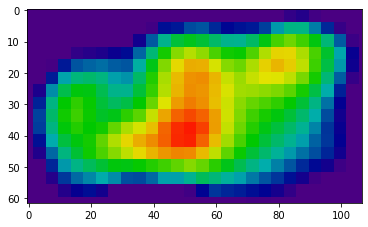

In [21]:
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
im = Image.open('sub1left.png')

NUM_BUCKETS = 6 # Just for example
colour_counts = [0] * NUM_BUCKETS

for pixel in im.getdata():
    hue, saturation, value = colorsys.hsv_to_rgb(pixel[0], pixel[1], pixel[2])
    hue_bucket = hue * NUM_BUCKETS // 255 # Using python3 to get an int
    colour_counts[hue_bucket] += 1

colour_names = ["red", "yellow", "green", "cyan", "blue", "magenta"]
for name, count in [x for x in zip(colour_names, colour_counts)]:
    print("{n} = {c}".format(n=name, c=count))
    plt.imshow(im)
backg = 0
real = 0

for pixel in im.getdata():
    if pixel == (0,0,0 ): # if your image is RGB (if RGBA, (0, 0, 0, 255) or so
        backg += 1
    else:
        real += 1
print('backg=' + str(backg)+', fore='+str(real))
plt.imshow(im)
b=int(31.8*colour_counts[4])
g=int(32.1*colour_counts[2])
y=int(32.4*colour_counts[1])
r=int(33*colour_counts[0])
sum=b+g+y+r
print("sum=",sum)
div= int(colour_counts[4]+colour_counts[2]+colour_counts[1]+colour_counts[0])
print("divident=",div)
avg_temp_left=sum/div
print("avg temperature=",avg_temp_left)
plt.imshow(im)


Subject1 right eye

red = 2496
yellow = 400
green = 320
cyan = 10552
blue = 272
magenta = 117
backg=0, fore=14157
sum= 114249
divident= 3488
avg temperature= 32.75487385321101


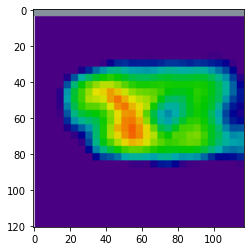

In [22]:
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
im = Image.open('sub1right.png')

NUM_BUCKETS = 6 # Just for example
colour_counts = [0] * NUM_BUCKETS

for pixel in im.getdata():
    hue, saturation, value = colorsys.hsv_to_rgb(pixel[0], pixel[1], pixel[2])
    hue_bucket = hue * NUM_BUCKETS // 255 # Using python3 to get an int
    colour_counts[hue_bucket] += 1

colour_names = ["red", "yellow", "green", "cyan", "blue", "magenta"]
for name, count in [x for x in zip(colour_names, colour_counts)]:
    print("{n} = {c}".format(n=name, c=count))
    plt.imshow(im)
backg = 0
real = 0

for pixel in im.getdata():
    if pixel == (0,0,0 ): # if your image is RGB (if RGBA, (0, 0, 0, 255) or so
        backg += 1
    else:
        real += 1
print('backg=' + str(backg)+', fore='+str(real))
plt.imshow(im)
b=int(31.8*colour_counts[4])
g=int(32.1*colour_counts[2])
y=int(32.4*colour_counts[1])
r=int(33*colour_counts[0])
sum=b+g+y+r
print("sum=",sum)
div= int(colour_counts[4]+colour_counts[2]+colour_counts[1]+colour_counts[0])
print("divident=",div)
avg_temp_right=sum/div
print("avg temperature=",avg_temp_right)
plt.imshow(im)


Feature 1 difference in temperature between left and right eyes

In [23]:
diff=avg_temp_left-avg_temp_right
print("Difference in temperature= ",diff)

Difference in temperature=  0.011894439471916485


# Feature2- Cornea Temperature difference

Subject1 left eye

red = 6078
yellow = 117
green = 102
cyan = 291
blue = 46
magenta = 0
sum= 209100
divident= 6343
avg temperature= 32.9654737505912


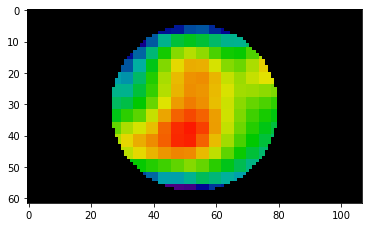

In [26]:
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
import cv2
import numpy as np
im=cv2.imread('sub1left.png')
h, w = im.shape[:2]
Y, X = np.ogrid[:h, :w]
center = (int(w/2), int(h/2))
H=int(h/2)
radius=w/4
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask = dist_from_center >= radius
masked_im = im.copy()
masked_im[mask]=0
#plt.imshow(masked_im)
a=cv2.imwrite('cornea_sept.png',masked_im)
im = Image.open('cornea_sept.png')

NUM_BUCKETS = 6 # Just for example
colour_counts = [0] * NUM_BUCKETS

for pixel in im.getdata():
    hue, saturation, value = colorsys.hsv_to_rgb(pixel[0], pixel[1], pixel[2])
    hue_bucket = hue * NUM_BUCKETS // 255 # Using python3 to get an int
    colour_counts[hue_bucket] += 1

colour_names = ["red", "yellow", "green", "cyan", "blue", "magenta"]
for name, count in [x for x in zip(colour_names, colour_counts)]:
    print("{n} = {c}".format(n=name, c=count))
masked_im=cv2.cvtColor(masked_im, cv2.COLOR_BGR2RGB)
plt.imshow(masked_im)    
b=int(31.8*colour_counts[4])
g=int(32.1*colour_counts[2])
y=int(32.4*colour_counts[1])
r=int(33*colour_counts[0])
sum=b+g+y+r
print("sum=",sum)
div= int(colour_counts[4]+colour_counts[2]+colour_counts[1]+colour_counts[0])
print("divident=",div)
avg_temp_left=sum/div
print("avg temperature=",avg_temp_left)


Subject1 right eye

red = 13240
yellow = 179
green = 176
cyan = 430
blue = 132
magenta = 0
sum= 452565
divident= 13727
avg temperature= 32.968966270853066


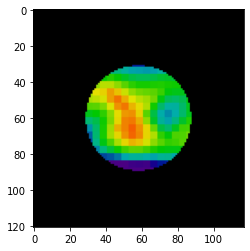

In [28]:
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
import cv2
import numpy as np
im=cv2.imread('sub1right.png')
h, w = im.shape[:2]
Y, X = np.ogrid[:h, :w]
center = (int(w/2), int(h/2))
H=int(h/2)
radius=w/4
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask = dist_from_center >= radius
masked_im = im.copy()
masked_im[mask]=0
#plt.imshow(masked_im)
a=cv2.imwrite('cornea_sept_right.png',masked_im)
im = Image.open('cornea_sept_right.png')

NUM_BUCKETS = 6 # Just for example
colour_counts = [0] * NUM_BUCKETS

for pixel in im.getdata():
    hue, saturation, value = colorsys.hsv_to_rgb(pixel[0], pixel[1], pixel[2])
    hue_bucket = hue * NUM_BUCKETS // 255 # Using python3 to get an int
    colour_counts[hue_bucket] += 1

colour_names = ["red", "yellow", "green", "cyan", "blue", "magenta"]
for name, count in [x for x in zip(colour_names, colour_counts)]:
    print("{n} = {c}".format(n=name, c=count))
masked_im=cv2.cvtColor(masked_im, cv2.COLOR_BGR2RGB)
plt.imshow(masked_im)    
b=int(31.8*colour_counts[4])
g=int(32.1*colour_counts[2])
y=int(32.4*colour_counts[1])
r=int(33*colour_counts[0])
sum=b+g+y+r
print("sum=",sum)
div= int(colour_counts[4]+colour_counts[2]+colour_counts[1]+colour_counts[0])
print("divident=",div)
avg_temp_right=sum/div
print("avg temperature=",avg_temp_right)


In [ ]:
Feature 2 difference in cornea temperature between left and right eyes

In [29]:
diff=avg_temp_left-avg_temp_right
print("Difference in temperature= ",diff)

Difference in temperature=  -0.003492520261865195


# Feature 3 is temperature difference against Cornea

62 107
62 107
[  0 186  95]
[  0 186  95]
[  0 186  95]
[  0 190  70]
[  0 190  70]
[  0 190  70]
[  0 190  70]
[  0 200   0]
[  0 200   0]
[  0 200   0]
[  0 200   0]
[104 213   0]
[104 213   0]
[104 213   0]
[104 213   0]
[222 227   0]
[222 227   0]
[222 227   0]
[222 227   0]
[237 155   0]
[237 155   0]
[237 155   0]
[237 155   0]
[240 124   0]
[240 124   0]
[240 124   0]
[240 124   0]
[238 143   0]
[238 143   0]
[238 143   0]
[238 143   0]
[232 190   0]
[232 190   0]
[232 190   0]
[232 190   0]
[203 225   0]
[203 225   0]
[203 225   0]
[203 225   0]
[139 217   0]
[139 217   0]
[139 217   0]
[139 217   0]
[101 213   0]
[101 213   0]
[101 213   0]
[101 213   0]
[ 75 210   0]
[ 75 210   0]
[ 75 210   0]
[ 75 210   0]
[ 46 206   0]
[ 46 206   0]
[0 0 0]
tdc= 4.050000000000004


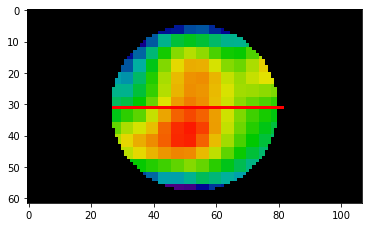

In [30]:
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
import cv2
import numpy as np
im = cv2.imread('sub1left.png')
h, w = im.shape[:2]
Y, X = np.ogrid[:h, :w]
print(h,w)
center = (int(w/2), int(h/2))
H=int(h/2)
radius=w/4
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
#print(dist_from_center)
mask = dist_from_center >= radius
masked_im = im.copy()
l=masked_im[mask]=0
plt.imshow(masked_im)
f,g=im.shape[:2]
print(f,g)
#plt.imshow(d)
masked_im=cv2.cvtColor(masked_im, cv2.COLOR_BGR2RGB)
image = cv2.rectangle(masked_im, (27,H), (81,H),(255,0,0),-1)
image_data = np.asarray(masked_im)
count=0
for i in range(H-1,H):
    for j in range(27,81):
           print(image_data[i][j])
           if image_data[i,j,0]==image_data[i+1,j+1,0] and image_data[i,j,1]==image_data[i+1,j+1,1] and image_data[i,j,2]==image_data[i+1,j+1,2]:
              count=count+0
           else:
               count=count+0.3
count=count/4
print('tdc=',count)
              

plt.imshow(image_data)
image_data=cv2.cvtColor(masked_im, cv2.COLOR_BGR2RGB)
aos=cv2.imwrite('tdc.png',image_data)
